<a href="https://colab.research.google.com/drive/1BIE0tmq9tkw9slaO_eUOE0fP_0CObn0T" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PASO 1**


In [82]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings
import urllib.request
import json
import os
import ssl
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [83]:
#Se configura para que muestre todas las columnas del data frame
pd.set_option('display.max_columns',None)
#Se configuran ambas variables como globales para facilitar la modificacion de las mismas
global df_banco, resultados

In [84]:
#Se lee el archivo en la ruta especificada y se imprime los primeros resultados para muestra
df_banco = pd.read_csv('german_credit.csv')
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [85]:
# Se utiliza para obtener las dimensiones del DataFrame.
# El primer argumento es numero de filas y el segundo es numero de columnas

df_banco.shape

(1000, 21)

In [86]:
#Se utiliza para obtener los nombres de todas las columnas del DataFrame
df_banco.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [87]:
# Entrega resumen del DataFrame df_banco.
#Incluye
# El número total de entradas (filas) en el DataFrame.
# El número de columnas.
# Los nombres de las columnas y el tipo de datos de cada columna.
# El número de valores no nulos (no faltantes) en cada columna.
# La cantidad de memoria utilizada por el DataFrame.

df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [88]:
##Para ver solo las columnas tipo object
#columnas = list(df_banco.select_dtypes(include=['object']).columns)

# Para ver solo las columnas tipo int64
#columnas = list(df_banco.select_dtypes(include=['int64']).columns)

# Para este procesamiento de datos ocuparemos las siguientes columnas para estandarizarlas
# y llevarlas a un formato que para la maquina sea mas facil identificar patrones.

columnas = ['account_check_status', 'credit_history', 'purpose', 'savings', 'present_emp_since',
            'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing',
            'job', 'telephone', 'foreign_worker']

#Se crea funcion que recibe una lista con las columnas a procesar para convertir
#los valores strings en categorias de numero.

"""
Ejemplo 1 empezando de 1:

El nombre de la columna: account_check_status
['no checking account', '< 0 DM', '0 <= ... < 200 DM', '>= 200 DM / salary assignments for at least 1 year']


Diccionario de mapeo para account_check_status: {'no checking account': 1, '< 0 DM': 2, '0 <= ... < 200 DM': 3, '>= 200 DM / salary assignments for at least 1 year': 4}

Ejemplo 2 empezando de 0 :

El nombre de la columna: foreign_worker
['yes', 'no']


Diccionario de mapeo para foreign_worker: {'yes': 1, 'no': 0}


"""

def procesar_datos(columnas):
  global df_banco

  #Se limpian los valores null y lo duplicados
  df_banco = df_banco.drop_duplicates() if df_banco.duplicated().any() else df_banco
  df_banco = df_banco.dropna() if df_banco.isnull().values.any() else df_banco

  #Array recibido al llamar la funcion se inicia en esta variable
  columnas = columnas

  #Se iterara en las columnas mostrando los valores unicos o "clases" que existen
  for columna in columnas:
        # Imprimir el nombre de la columna y sus clases
        print(f'El nombre de la columna: {columna}')
        valores_unicos = list(df_banco[columna].value_counts().index)
        print(valores_unicos)
        print('\n')

        #Se determinan en esta variable si existen ciertas palabras para que el indice
        #empiece de 0 para mapear o de lo contrario que empiece el indice en 1
        # Determinar si contiene valores específicos
        contiene_valores_especificos = any(valor in ['0', 'None', 'no', 'none'] for valor in valores_unicos)

        # Crear el diccionario de mapeo automáticamente
        mapeo = {}
        indice = 1  # Empezamos en 1 para los valores no específicos

        for valor in valores_unicos:
            if valor in ['0', 'None', 'no','none'] and contiene_valores_especificos:
                mapeo[valor] = 0
            else:
                while indice in mapeo.values():
                    indice += 1
                mapeo[valor] = indice
                indice += 1

        # Mapear la columna
        df_banco[columna] = df_banco[columna].map(mapeo)

        # Imprimir el diccionario de mapeo
        print(f'Diccionario de mapeo para {columna}: {mapeo}')
        print('\n')

# Llamar a la función con las columnas de interés
procesar_datos(columnas)
df_banco.to_csv('german_credit_procesadov1.csv', index=False)


El nombre de la columna: account_check_status
['no checking account', '< 0 DM', '0 <= ... < 200 DM', '>= 200 DM / salary assignments for at least 1 year']


Diccionario de mapeo para account_check_status: {'no checking account': 1, '< 0 DM': 2, '0 <= ... < 200 DM': 3, '>= 200 DM / salary assignments for at least 1 year': 4}


El nombre de la columna: credit_history
['existing credits paid back duly till now', 'critical account/ other credits existing (not at this bank)', 'delay in paying off in the past', 'all credits at this bank paid back duly', 'no credits taken/ all credits paid back duly']


Diccionario de mapeo para credit_history: {'existing credits paid back duly till now': 1, 'critical account/ other credits existing (not at this bank)': 2, 'delay in paying off in the past': 3, 'all credits at this bank paid back duly': 4, 'no credits taken/ all credits paid back duly': 5}


El nombre de la columna: purpose
['domestic appliances', 'car (new)', 'radio/television', 'car (used)',

# **PASO 2**


In [89]:
#En esta funcion se aplicara la ingeneria de datos puediendo obtener nuevas
#caracteristicas (nuevas columnas que ayuden al entrenamiento del modelo)
#del dataframe a traves de los valores de algunas columnas
"""
Ejemplo:
nombre de la columna y sus valores: personal_status_sex=
 {'male : single': 1, 'female : divorced/separated/married': 2,
'male : married/widowed': 3, 'male : divorced/separated': 4}

A partir de eso podemos agregar una nueva clase a la columna pudiendo ser
      'female : single' : 5
que es totalmente coherente con el contexto del problema y nos ayuda a tener
mejor precision con el modelo de Machine Learning.
Tambien se pueden obtener una columna nueva la que llamaremos sexo y otra estado civil
las cuales seran mapeadas de la siguiente manera :

    sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
    est_civil = {1:1, 5:1, 2:0, 3:0, 4:0}

Tambien se generaran otras columnas categorizando y agrupando las columnas existentes

Ejemplo:

  Aca con la columna "age" se obtendra una nueva columna llamada "rango_edad"
  donde se agruparan de acuerdo a los rangos de la variable bins y que tomaran el valor de labels:

    df_banco['rango_edad'] = pd.cut(x=df_banco['age'],
                                    bins=[20, 30, 40, 50, 60],
                                    labels=[1, 2, 3, 4])

Entre otras trasnformaciones que se haran para el modelo.
"""


def feature_engineering():
    global df_banco

    # Mapeo de las columnas sexo y estado civil.
    dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
    dic_est_civil = {1:1, 5:1, 2:0, 3:0, 4:0}

    # Agregar columnas al data frame de df_banco
    df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)
    df_banco['estado_civil'] = df_banco['personal_status_sex'].map(dic_est_civil)

    # Ajustar la columna 'rango_edad'
    df_banco['rango_edad'] = pd.cut(x=df_banco['age'],
                                    bins=[20, 30, 40, 50, 60],
                                    labels=[1, 2, 3, 4])

    # Ajustar la columna 'rango_plazos_credito'
    df_banco['rango_plazos_credito'] = pd.cut(x=df_banco['duration_in_month'],
                                              bins=[12, 24, 36, 48, 60, 72],
                                              labels=[1, 2, 3, 4, 5])

    # Ajustar la columna 'rango_valor_credito'
    df_banco['rango_valor_credito'] = pd.cut(x=df_banco['credit_amount'],
                                            bins=[1000, 2000,3000, 4000, 5000,
                                                  6000, 7000, 8000, 9000, 10000,
                                                  11000, 12000, 13000, 14000],
                                            labels=[1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                    10, 11, 12, 13])

    # Filtrar los registros válidos distintos a null
    df_banco = df_banco.dropna()

    # Eliminar columnas originales no necesarias, ya que se utilizaran las creadas
    df_banco = df_banco.drop(columns=['personal_status_sex', 'age',
                                      'duration_in_month', 'credit_amount'])

    # Resetear el índice después de eliminar filas
    df_banco.reset_index(drop=True, inplace=True)

    return df_banco

# Ejecutar la función y obtener el DataFrame limpio
df_banco_cleaned = feature_engineering()

#guardar datafrime df_banco ya procesado
df_banco_cleaned.to_csv('german_credit_procesadov2.csv', index=False)

# Verifica el resultado y suma de valores null
print(df_banco_cleaned.head())
print(df_banco_cleaned.isna().sum())

   default  account_check_status  credit_history  purpose  savings  \
0        1                     3               1        1        1   
1        0                     2               1        3        1   
2        1                     2               3        2        1   
3        0                     1               1        6        2   
4        0                     1               1        3        4   

   present_emp_since  installment_as_income_perc  other_debtors  \
0                  1                           2              0   
1                  3                           2              1   
2                  1                           3              0   
3                  1                           2              0   
4                  2                           3              0   

   present_res_since  property  other_installment_plans  housing  \
0                  2         2                        0        1   
1                  4         3          

# **PASO 3**


<ipython-input-90-9d8cc025e9d9>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, i[0]+1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   default                     579 non-null    int64   
 1   account_check_status        579 non-null    int64   
 2   credit_history              579 non-null    int64   
 3   purpose                     579 non-null    int64   
 4   savings                     579 non-null    int64   
 5   present_emp_since           579 non-null    int64   
 6   installment_as_income_perc  579 non-null    int64   
 7   other_debtors               579 non-null    int64   
 8   present_res_since           579 non-null    int64   
 9   property                    579 non-null    int64   
 10  other_installment_plans     579 non-null    int64   
 11  housing                     579 non-null    int64   
 12  credits_this_bank           579 non-null    int64   
 13  job                 

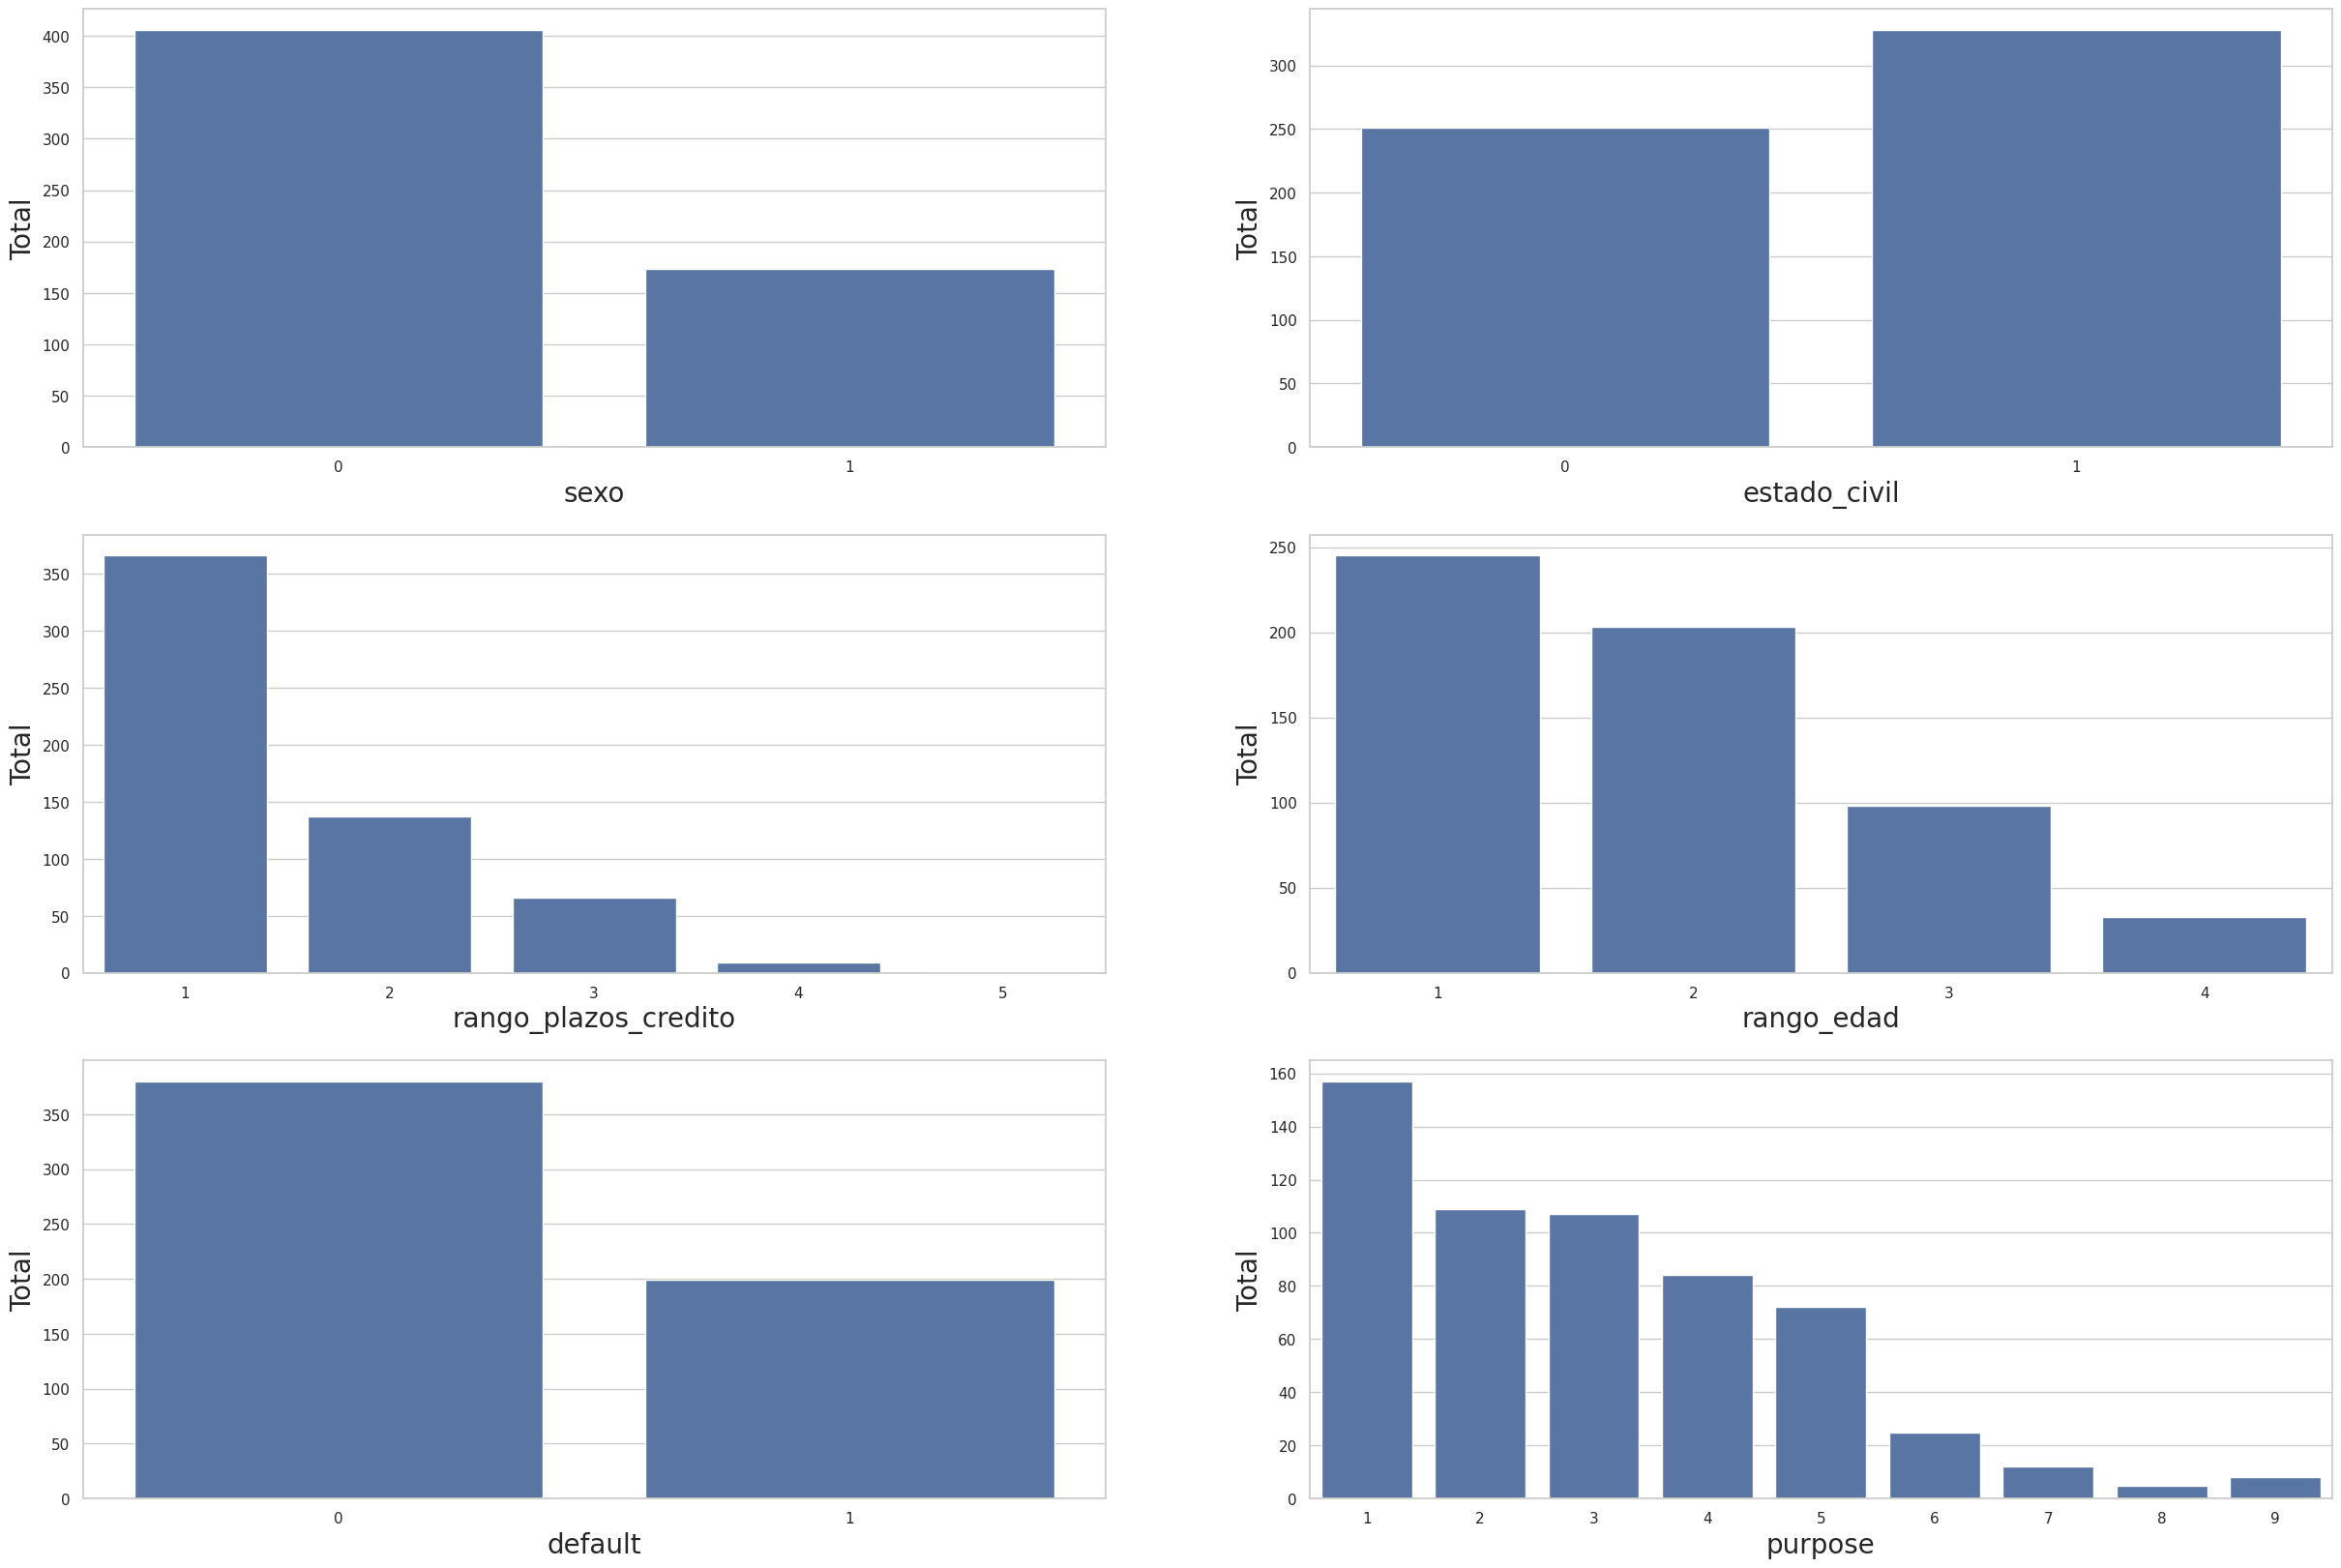

In [90]:
#Funion para crear graficos en las columnas de la variable histogramas
def analisis_exploratorio(data):
  histogramas = ['sexo','estado_civil','rango_plazos_credito','rango_edad','default', 'purpose']
  lista_histogramas = list(enumerate(histogramas))
  plt.figure(figsize = (30,20))
  plt.title('Histogramas')
  for i in lista_histogramas:
    plt.subplot(3, 2, i[0]+1)
    sns.countplot(x = i[1], data = data)
    plt.xlabel(i[1], fontsize=20)
    plt.ylabel('Total', fontsize=20)

##Llamada a la funcion
analisis_exploratorio(df_banco_cleaned)

#Info de las columnas
df_banco_cleaned.info()

# **PASO 4**


<ipython-input-90-9d8cc025e9d9>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, i[0]+1)
<ipython-input-90-9d8cc025e9d9>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, i[0]+1)


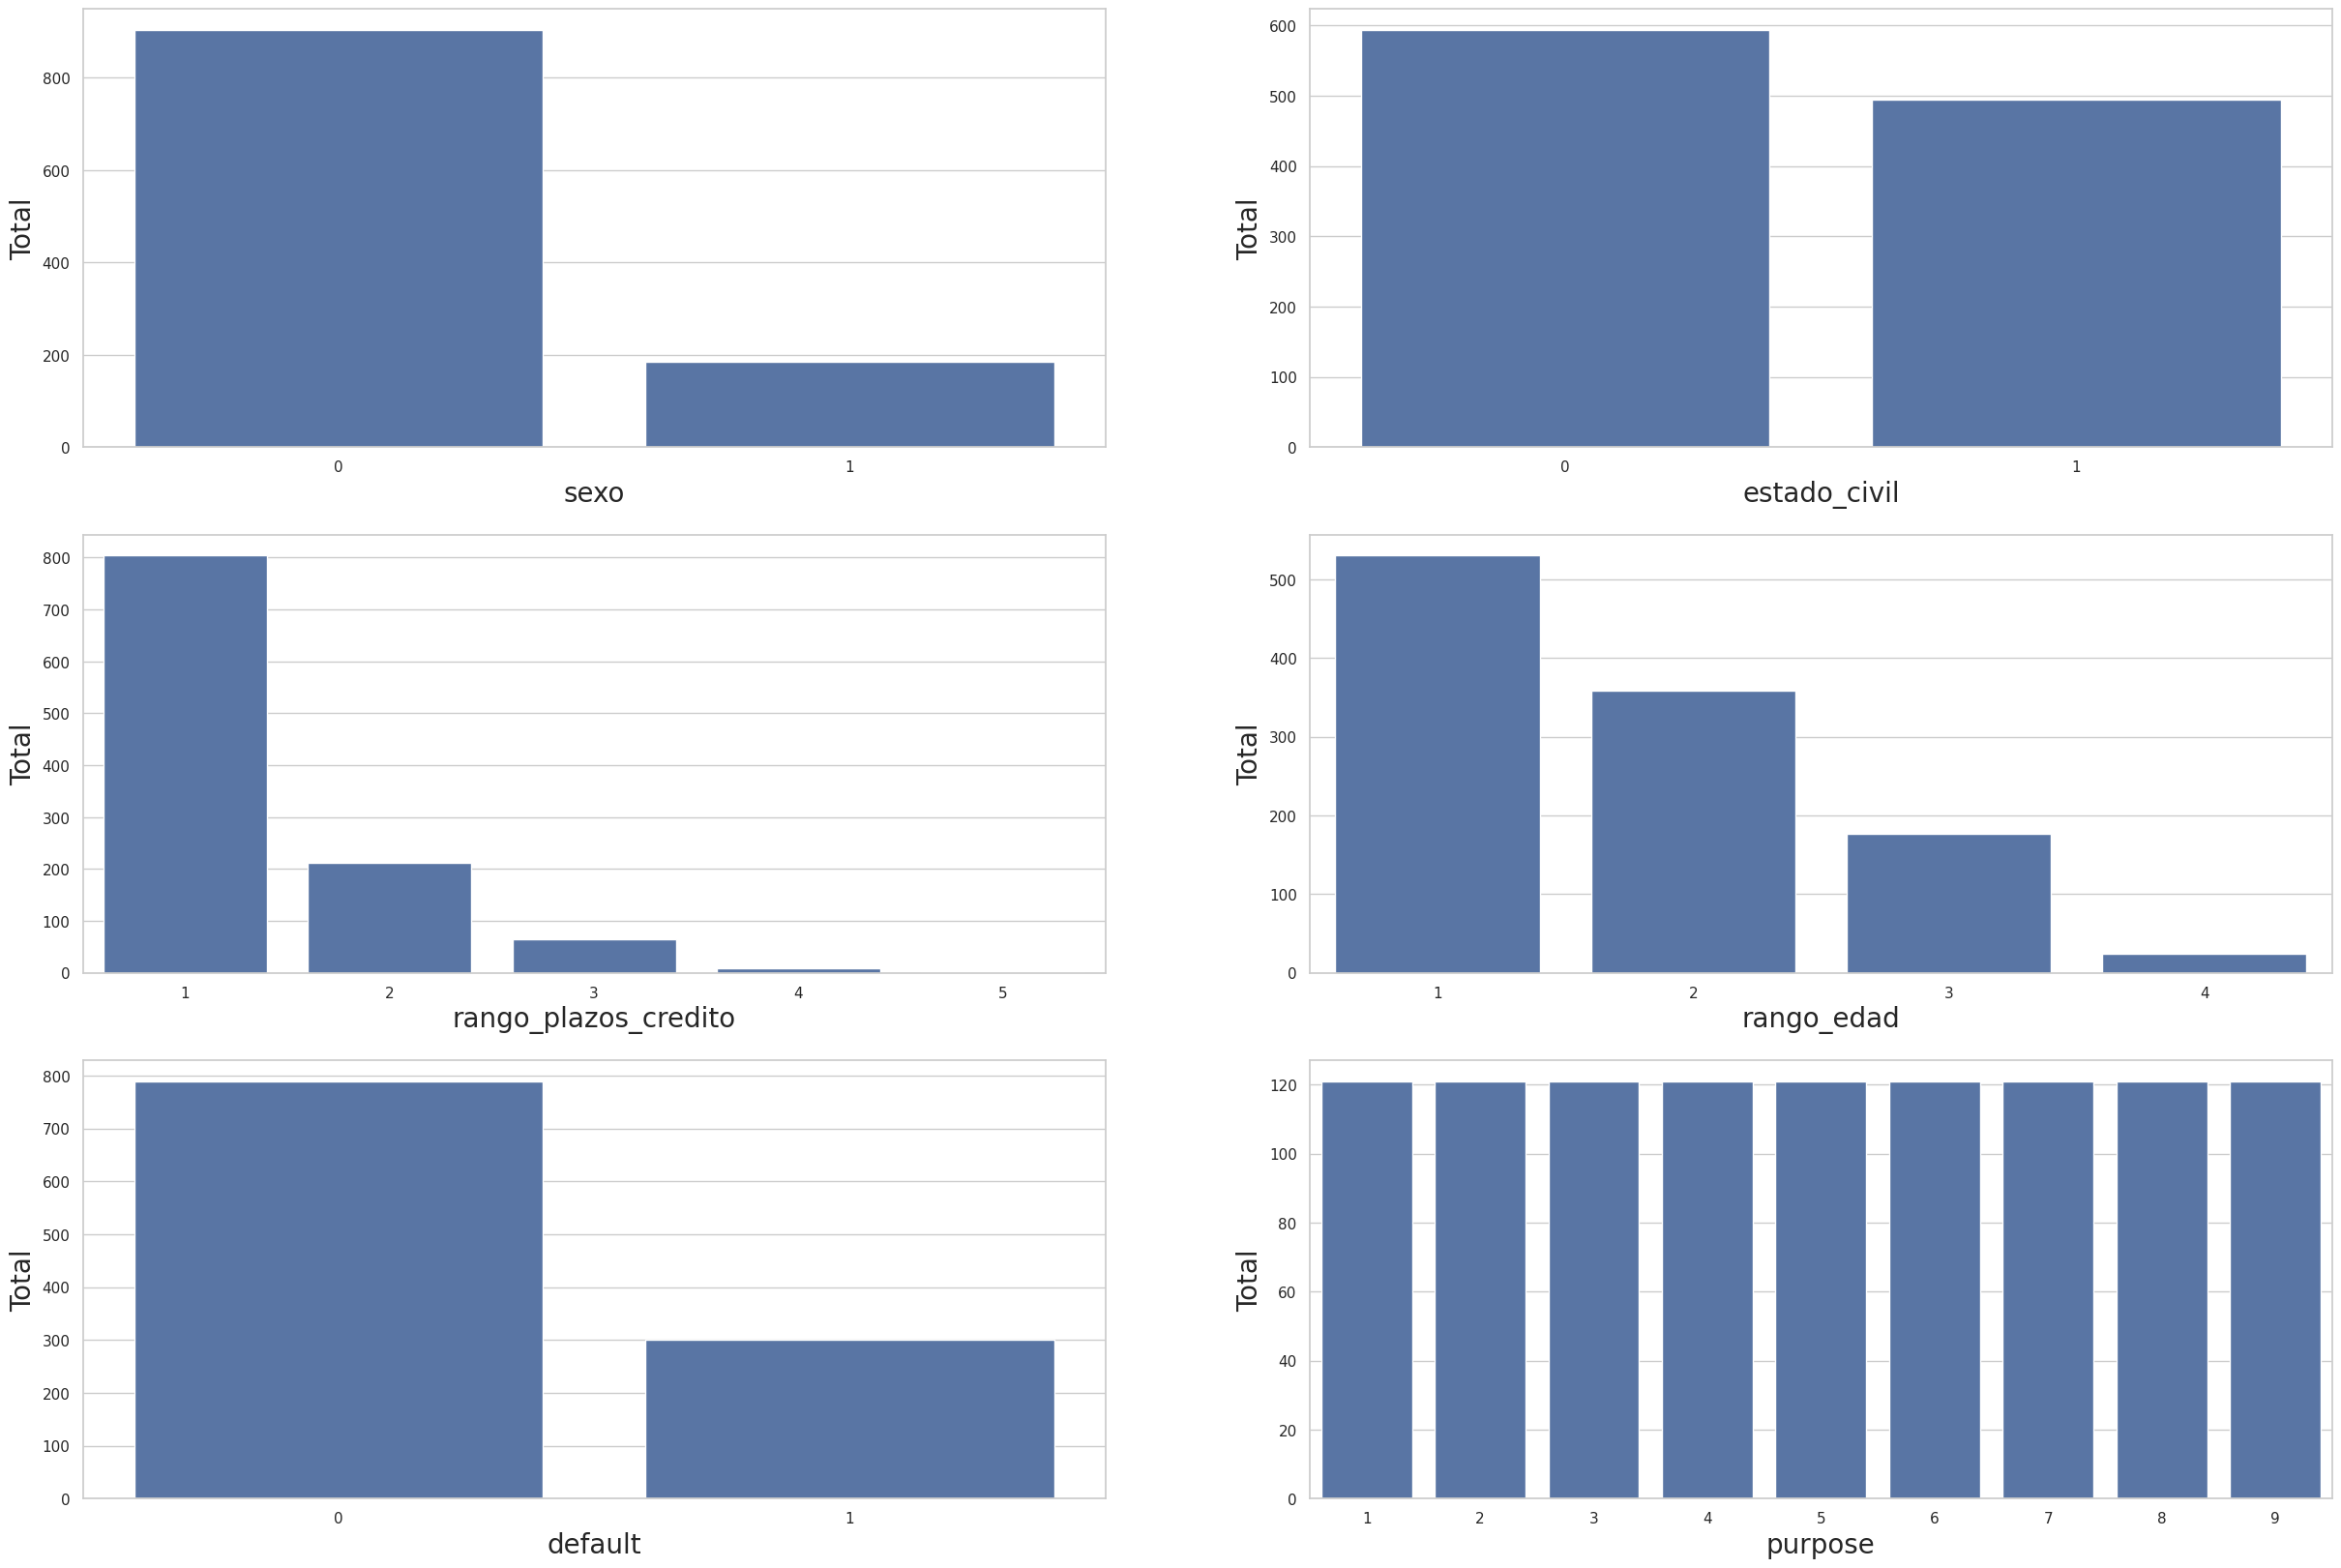

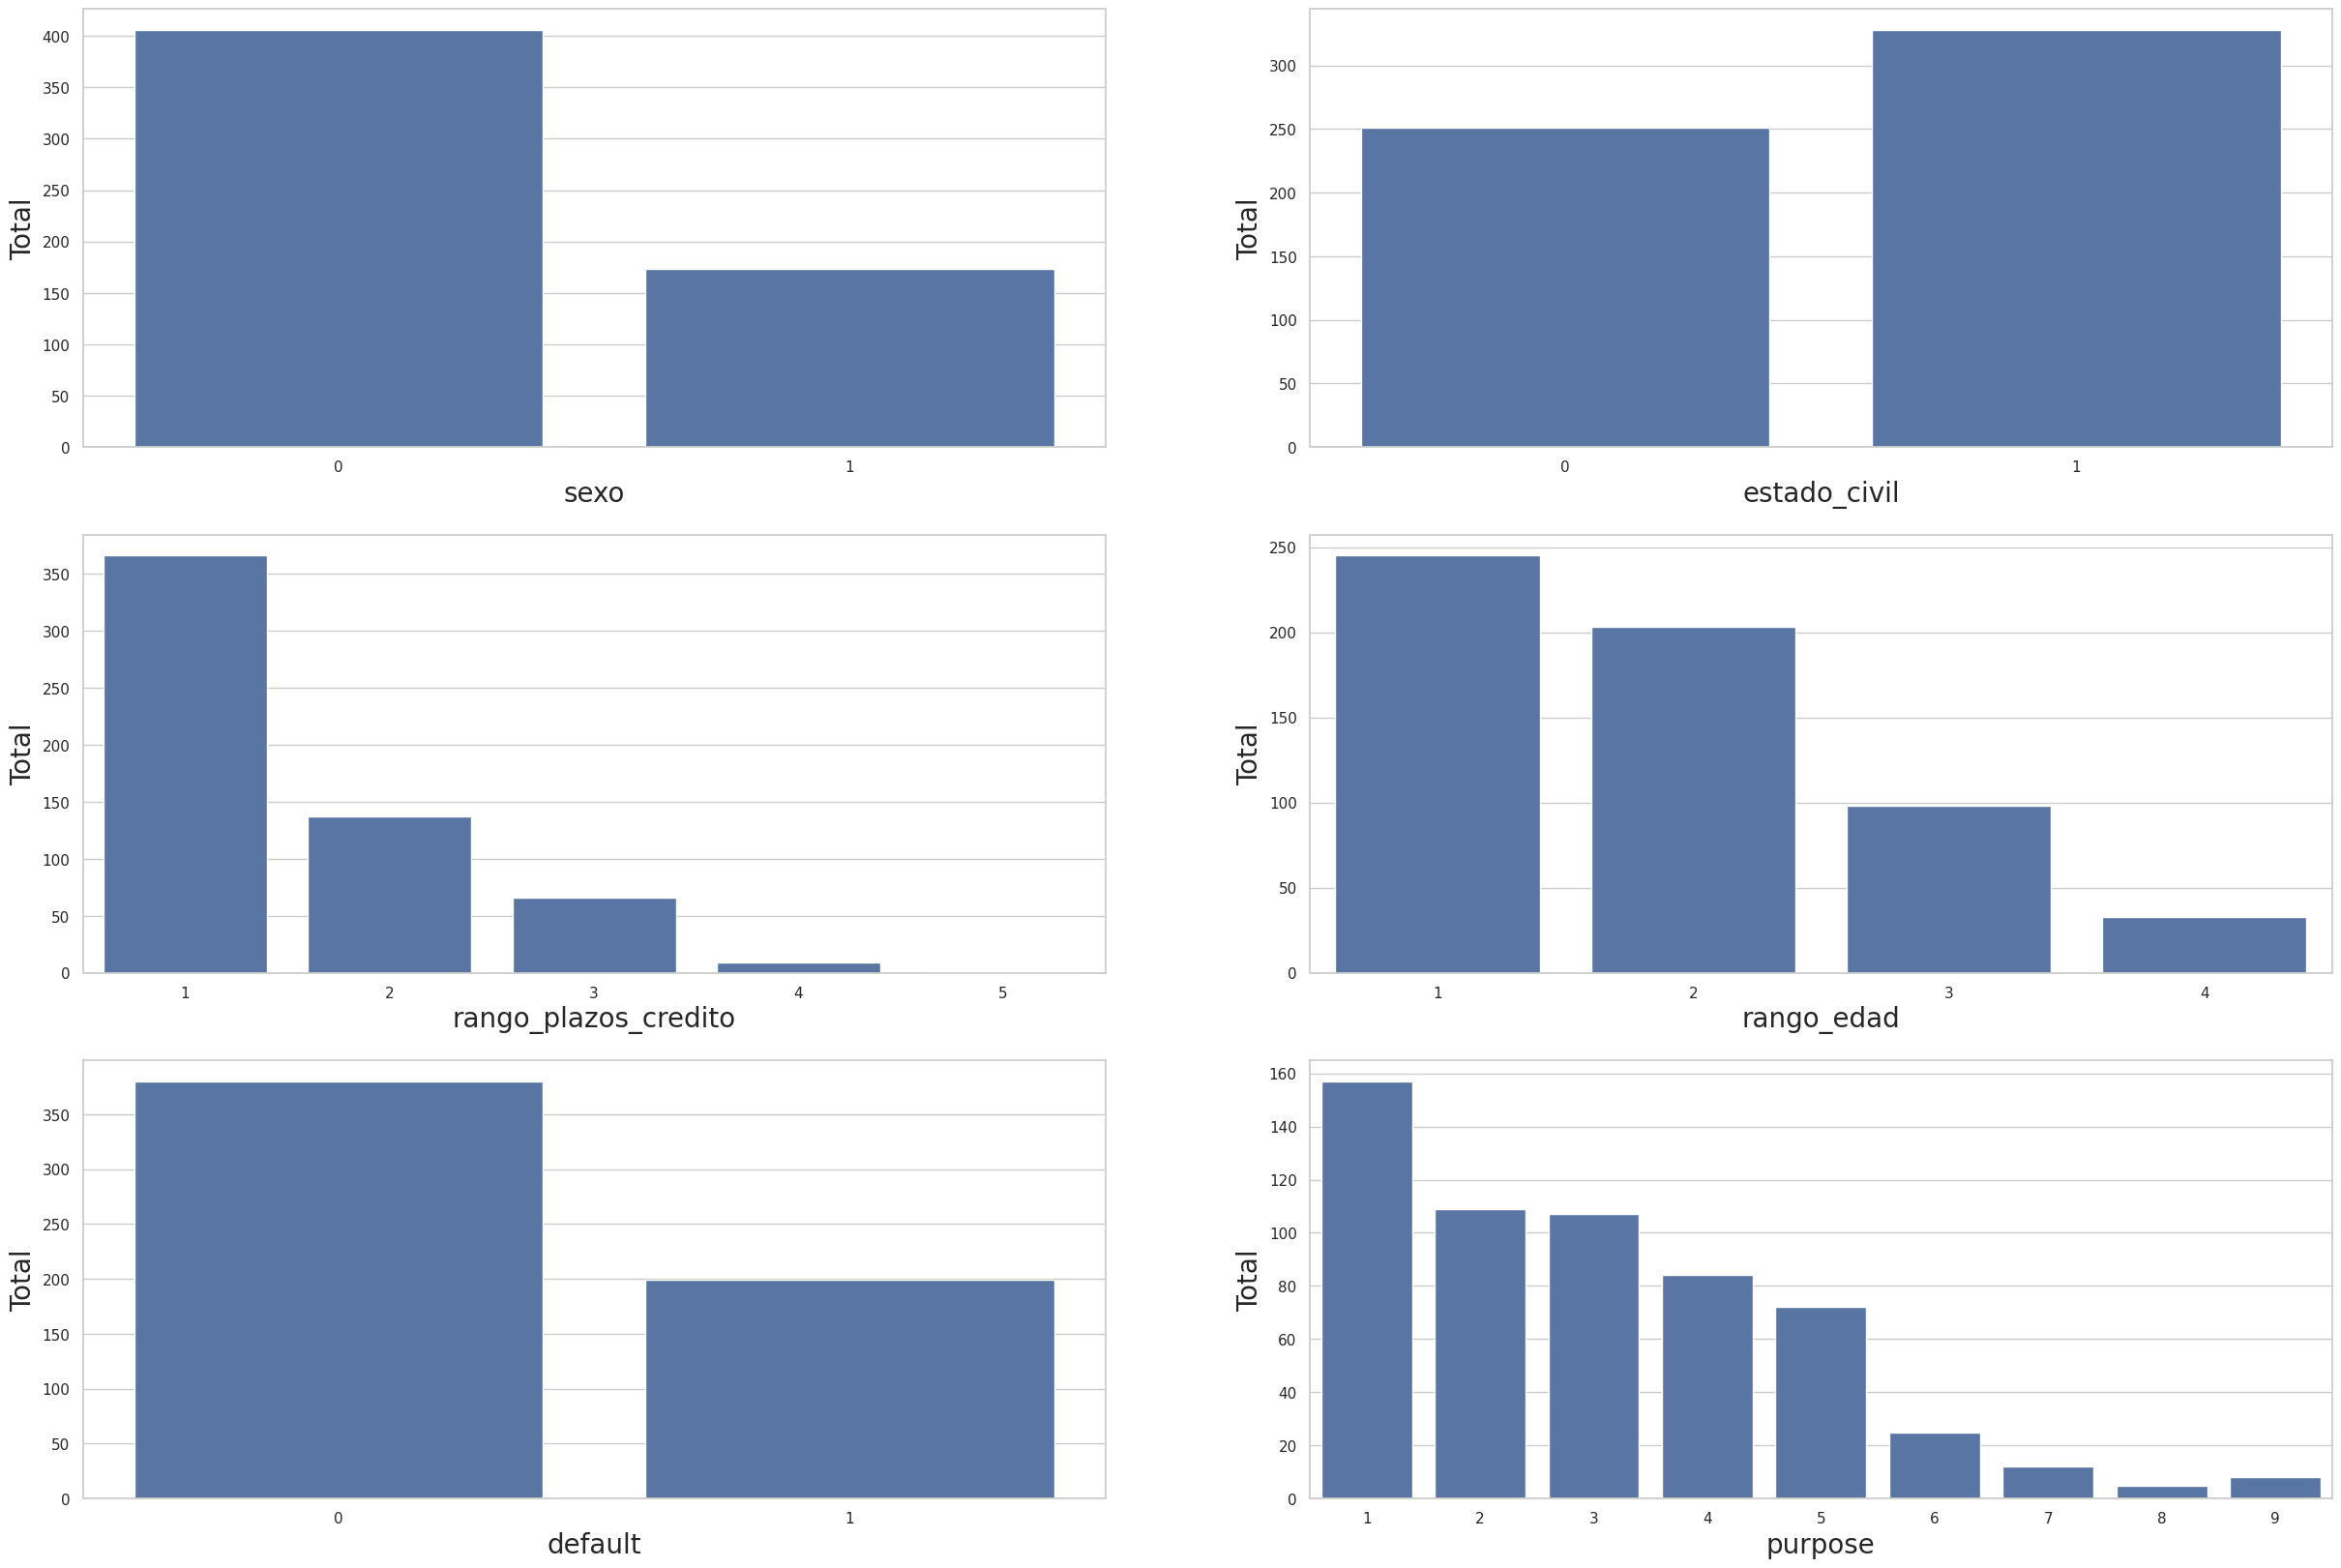

In [91]:
def balanceo_clases(data, column_target):
  # Preparar los datos para entrenamiento y prueba

  # Se define purpose como columna objetivo y se separa la data en dos ejes
  #cada una con su variable
  X = data.drop(column_target, axis=1)
  y = data[column_target]

  #Se generan varias variables con los ejes de la data y se generan tambien test con la funcion
  #importada train_test_split() y las variables anteriormente realizadas
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


  # Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
  # esto se aplica en la columna objetivo que se definio anterioremente
  smote = SMOTE(random_state=42, k_neighbors=2)  # Ajusta k_neighbors según tus datos
  X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

  # Se vuelven a unir los ejes en un mismo archivo tanto para el archivo
  # entrenamiento de la machine learning y otro para los datos de prueba
  # Se unen nuevamente ya que serán procesados en AZURE y esta plataforma requiere
  # vengan todas las columans en el archivo y dentro de la consola de indica
  # la columna objetivo.

  X_train_resampled[column_target] = y_train_resampled
  X_test[column_target] = y_test

  # Guardar los conjuntos de datos balanceados para su uso en Azure
  X_train_resampled.to_csv('X_train_resampled.csv', index=False)
  X_test.to_csv('X_test.csv', index=False)

#Llamamos a la funcion del analisis exploratorio para verificar las frecuencias en las clases
#y verificar lo hecho por el SMOTE

balanceo_clases(df_banco_cleaned, 'purpose')

analisis_exploratorio(X_train_resampled)
analisis_exploratorio(df_banco_cleaned)

In [92]:

# Crear un DataFrame con 20 registros de datos simulados y aleatorios
data = {
    'default': np.random.choice([0, 1], size=20),
    'account_check_status': np.random.choice([1, 2, 3, 4, 5], size=20),
    'credit_history': np.random.choice([1, 2, 3, 4], size=20),
    'savings': np.random.choice([1, 2, 3, 4, 5], size=20),
    'present_emp_since': np.random.choice([1, 2, 3, 4, 5], size=20),
    'installment_as_income_perc': np.random.choice([1, 2, 3, 4], size=20),
    'other_debtors': np.random.choice([0, 1, 2], size=20),
    'present_res_since': np.random.choice([1, 2, 3, 4, 5], size=20),
    'property': np.random.choice([1, 2, 3, 4], size=20),
    'other_installment_plans': np.random.choice([0, 1, 2], size=20),
    'housing': np.random.choice([1, 2, 3], size=20),
    'credits_this_bank': np.random.choice([1, 2, 3, 4], size=20),
    'job': np.random.choice([1, 2, 3, 4], size=20),
    'people_under_maintenance': np.random.choice([1, 2], size=20),
    'telephone': np.random.choice([0, 1], size=20),
    'foreign_worker': np.random.choice([0, 1], size=20),
    'sexo': np.random.choice([0, 1], size=20),
    'estado_civil': np.random.choice([0, 1], size=20),
    'rango_edad': np.random.choice([1, 2, 3, 4], size=20),
    'rango_plazos_credito': np.random.choice([1, 2, 3, 4, 5], size=20),
    'rango_valor_credito': np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], size=20),
}

df_prueba = pd.DataFrame(data)

# Guardar el DataFrame en un archivo CSV
df_prueba.to_csv('datos_simulados_prueba.csv', index=False)

print(df_prueba)


    default  account_check_status  credit_history  savings  present_emp_since  \
0         0                     4               3        4                  3   
1         0                     3               2        2                  1   
2         0                     5               2        2                  2   
3         0                     2               4        4                  1   
4         0                     4               1        4                  4   
5         0                     4               4        3                  4   
6         0                     4               4        1                  1   
7         0                     3               4        4                  1   
8         1                     4               1        5                  2   
9         0                     5               4        1                  3   
10        0                     5               4        3                  3   
11        0                 

# **PASO 5**


In [93]:
##Conexion a la api del modelo generado en AZURE
##Conexion estara disponible hasta el 15 de Agosto de 2024 por temas de costo ##

def allowSelfSignedHttps(allowed):
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

allowSelfSignedHttps(True)

# Leer el archivo CSV y convertirlo a JSON
file_path = 'datos_simulados_prueba.csv'  # Reemplaza con la ruta a tu archivo CSV
df = pd.read_csv(file_path)

# Convertir el DataFrame a formato JSON
data = {
  "input_data": {
    "columns": df.columns.tolist(),
    "index": df.index.tolist(),
    "data": df.values.tolist()
  }
}

body = str.encode(json.dumps(data))

url = 'https://studio-ml-data-banco-wbwys.eastus2.inference.ml.azure.com/score' # ENDPOINT DE API GENERADA EN AZURE
api_key = 'tjgvCMR5aCjMmXS4Jvdtj5DPm0xuM2gT'  # API KEY GENERADA EN AZURE

headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}

req = urllib.request.Request(url, body, headers)

try:
    response = urllib.request.urlopen(req)
    result = response.read()
    # Decodificar el resultado
    predictions = json.loads(result.decode('utf-8'))

    # Imprimir el resultado para ver su estructura
    print("Resultado de la API:", predictions)

    # Suponiendo que el resultado es una lista de predicciones
    if isinstance(predictions, list):
        predictions_list = predictions
    else:
        # Si el resultado es un diccionario, ajusta esto según la estructura observada
        predictions_list = predictions.get('result', [])

    # Agregar las predicciones al DataFrame
    df['purpose_predictions'] = predictions_list

    # Guardar el DataFrame con las predicciones en un nuevo archivo CSV
    output_file_path = 'datos_simulados_prueba_with_predictions.csv'
    df.to_csv(output_file_path, index=False)
    print(f"Archivo guardado en {output_file_path}")

except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))
    print(error.info())
    print(error.read().decode("utf8", 'ignore'))


Resultado de la API: [2, 3, 4, 2, 3, 5, 10, 3, 2, 10, 3, 2, 2, 10, 10, 8, 5, 1, 2, 3]
Archivo guardado en datos_simulados_prueba_with_predictions.csv
